# Laborator №1

### Part I: Exercises

Excercise 1.

In [52]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import math
d = [0.3, 0.4, 0.7, 0.5, 0.8, 0.45]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.45, 0.45, 0.0],
  [0.3, 0.8, 0.8, 0.45]],
 'ivl': [1, 2, 3, 4],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

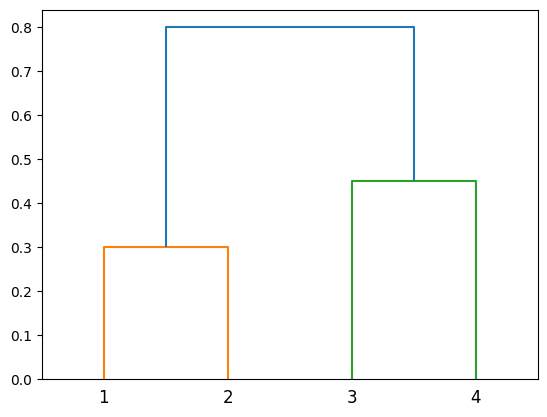

In [53]:
# a) complete linkage
exo1_hc_complete = linkage(d, "complete")
dendrogram(exo1_hc_complete, labels=[1,2,3,4])


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.4, 0.4, 0.3],
  [0.0, 0.45, 0.45, 0.4]],
 'ivl': [4, 3, 1, 2],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

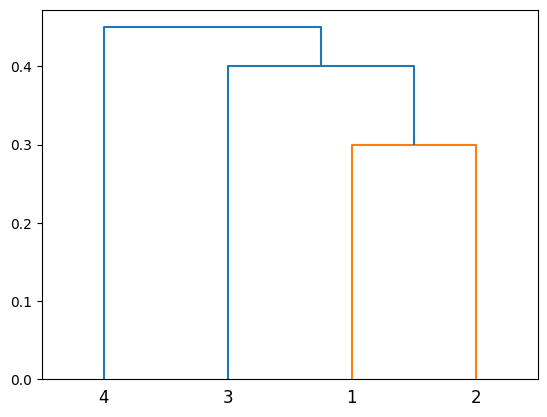

In [54]:
# b) single linkage
exo1_hc_single = linkage(d, "single")
dendrogram(exo1_hc_single, labels=[1,2,3,4])

In [55]:
# c) cut complete dendagram for 2 clusters
    #(1,2), (3,4)
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(exo1_hc_complete, n_clusters=2))
# d) cut single dendagram for 2 clusters
    #(1,2,3), (4)
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(exo1_hc_single, n_clusters=2))

[[0]
 [0]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [1]]


In [56]:
#Compare complete and single linkage
column_lables = ["sub-cluster", "sub-cluster", "distance", "cluster size"]
df = pd.DataFrame(exo1_hc_complete, columns=column_lables)
df

,sub-cluster,sub-cluster,distance,cluster size
0,0.0,1.0,0.30,2.0
1,2.0,3.0,0.45,2.0
2,4.0,5.0,0.80,4.0


In [57]:
#Compare complete and single linkage
column_lables = ["sub-cluster", "sub-cluster", "distance", "cluster size"]
df = pd.DataFrame(exo1_hc_single, columns=column_lables)
df

,sub-cluster,sub-cluster,distance,cluster size
0,0.0,1.0,0.30,2.0
1,2.0,4.0,0.40,3.0
2,3.0,5.0,0.45,4.0


Exercise 2.

In [58]:
import numpy as np

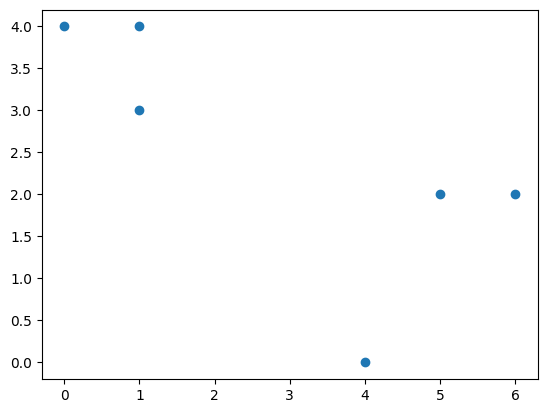

In [59]:
X1 = [1, 1, 0, 5, 6, 4]
X2 = [4, 3, 4, 2, 2, 0]
X =np.array([X1, X2])

#a)
plt.plot(X1,X2,"o")

In [60]:
#b)
from random import choice
l = [1, 2]  
labels = [choice(l) for x in range(0,len(X1))]
print(labels)

[1, 1, 2, 2, 1, 1]


In [61]:
#b)
from random import choice
l = [1, 2]
labels = [choice(l) for x in range(0, len(X1))]
labels

[1, 2, 2, 2, 2, 2]

In [62]:
# c) centroids
def calc_centr(X, labels):
    # X - massiv [[x],[y]]
    # labels - massiv classters
    # k - number of clusters

    x1, x2 = 0, 0
    y1, y2 = 0, 0
    n1, n2 = 0, 0 # number of points of klaster 1 and 2
    
    for i in range(0, len(X[0])):
        if labels[i] == 1:
            x1 += X[0][i]
            y1 += X[1][i]
            n1 += 1
        else:
            x2 += X[0][i] 
            y2 += X[1][i] 
            n2 += 1           
    
    c1 = np.round([x1/n1, y1/n1], decimals=2)
    c2 = np.round([x2/n2, y2/n2], decimals=2)
    
    return c1, c2  

In [63]:
c1, c2 = calc_centr(X, labels)
print(c1, c2, sep='\n')  

[1. 4.]
[3.2 2.2]


In [64]:
#d 
def eucl_dist(x1, x2):
    return math.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

eucl_dist([X1[0], X2[0]], c1)

0.0

In [65]:
def assign_labels(X, centroid1, centroid2):
    labels = []
    for i in range(len(X[0])):
        if (eucl_dist([X[0][i],X[1][i]], centroid2) < eucl_dist([X[0][i],X[1][i]], centroid1)):
            labels.append(1)
        else:
            labels.append(2)
    return(labels)

labels = assign_labels(X, c1, c2)
print(labels)

[2, 2, 2, 1, 1, 1]


In [66]:
#e)
last_labels = []
while (not(last_labels == labels)):
    last_labels = labels
    centroid1 = calc_centr(X,labels)[0]
    centroid2 = calc_centr(X,labels)[1]
    print(centroid1)
    print(centroid2)
    

labels = assign_labels(X, centroid1, centroid2)

[5.   1.33]
[0.67 3.67]


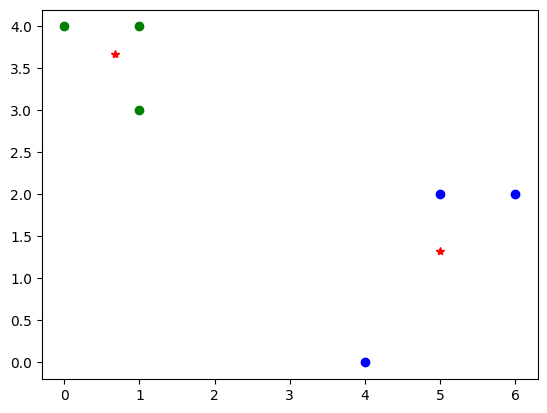

In [67]:
for i in range(len(X[0])):
    if labels[i] ==1:
        col="green"
    else:
        col="blue"
    plt.plot(X[0][i],X[1][i],"o",color=col)
        
plt.plot(centroid1[0],centroid1[1],"*",color="red")
plt.plot(centroid2[0],centroid2[1],"*",color="red")

## Part II: Practical applications

### K-means clustering

In [68]:
import numpy as np

In [69]:
X = np.random.rand(50, 2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

Text(0, 0.5, 'X2')

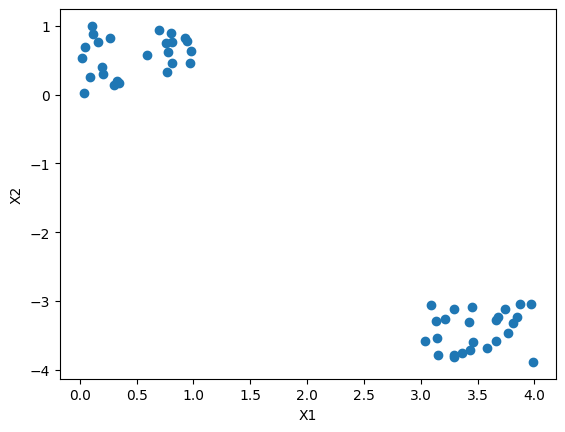

In [70]:
plt.plot(X[:,0], X[:, 1], "o")
plt.xlabel("X1")
plt.ylabel("X2")

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=100).fit(X)

In [72]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 3.49447452 -3.42452777]
 [ 0.48209762  0.56907658]]


Text(0, 0.5, 'X2')

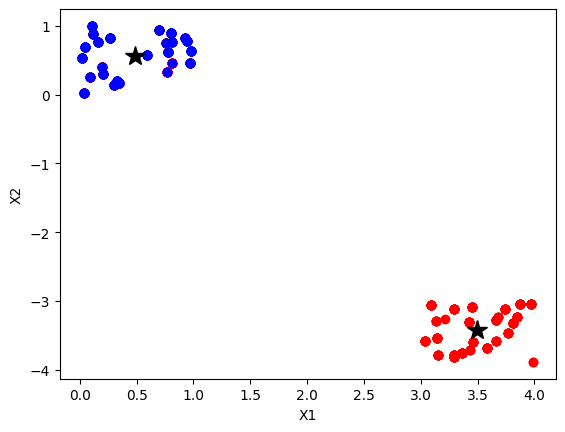

In [73]:
for i in range(0, X.shape[0]):
    if kmeans.labels_[i] == 0:
        plt.plot(X[i:,0], X[i:,1], "o", color="red")
    else:
        plt.plot(X[i:,0], X[i:,1], "o", color="blue")

centroid1 = kmeans.cluster_centers_[0]
centroid2 = kmeans.cluster_centers_[1]

plt.plot(centroid1[0], centroid1[1], "*", color="black", markersize=15)
plt.plot(centroid2[0], centroid2[1], "*", color="black", markersize=15)

plt.xlabel("X1")
plt.ylabel("X2")

DataFrame dfHVC

In [74]:
df = pd.read_csv("HCVdata.csv", sep=";")
df

,Unnamed: 0,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,m,32,38.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,m,32,38.5,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,m,32,46.9,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,m,32,43.2,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,m,32,39.2,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,611,3=Cirrhosis,f,62,32.0,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
563,612,3=Cirrhosis,f,64,24.0,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
564,613,3=Cirrhosis,f,64,29.0,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
565,614,3=Cirrhosis,f,46,33.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [75]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Sex           0
Age           0
ALB           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [76]:
print('Sex: \n', np.unique(df.Sex))
print('Category: \n', np.unique(df[['Category']]))

Sex: 
 ['f' 'm']
Category: 
 ['0=Blood Donor' '1=Hepatitis' '2=Fibrosis' '3=Cirrhosis']


In [77]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
dfHVC =pd.DataFrame()
dfHVC['Sex'] = number.fit_transform(df['Sex'].astype('str'))
dfHVC['Category'] = number.fit_transform(df['Category'].astype('str'))
dfHVC_labels = df['Category']
dfHVC_labels


0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
562      3=Cirrhosis
563      3=Cirrhosis
564      3=Cirrhosis
565      3=Cirrhosis
566      3=Cirrhosis
Name: Category, Length: 567, dtype: object

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfHVC_stdscaler = scaler.fit_transform(df[['Age', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']])
dfHVC_scaled = pd.DataFrame(dfHVC_stdscaler, columns=['Age', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])
dfHVC_scaled

,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.532101,-0.616040,-0.918335,-0.358858,-0.210408,-0.576310,-1.896583,0.478422,-0.449531,-0.644867
1,-1.532101,-0.616040,-0.413010,-0.279178,-0.414090,1.405405,-0.482225,-0.145943,-0.380586,0.853574
2,-1.532101,1.021371,0.479895,0.575851,-0.289617,0.316396,-0.121879,0.088194,-0.033887,1.412992
3,-1.532101,0.300130,0.205155,-0.343535,0.434585,-0.389356,-0.536277,-0.028875,-0.022068,0.693740
4,-1.532101,-0.479589,0.303276,-0.276113,-0.091593,0.461286,-0.914640,-0.106921,-0.098893,-0.704805
...,...,...,...,...,...,...,...,...,...,...
562,1.490170,-1.883084,-1.006644,2.344136,2.194172,-1.211955,0.869072,-0.503003,12.134041,-0.744763
563,1.691654,-3.442523,-1.153826,0.324552,0.496822,-3.095520,-2.085764,-0.360569,0.019299,-0.185345
564,1.691654,-2.467874,-1.124389,1.997834,2.081015,-3.039433,-1.536237,-0.288377,0.576774,1.952430
565,-0.121708,-1.688154,0.617265,0.863925,0.496822,-2.151400,-1.022744,-0.575195,0.297052,-0.245283


In [79]:
from sklearn.cluster import KMeans
dfHVC_Kmeans4 = KMeans(n_clusters=4, n_init=50, random_state=1000).fit(dfHVC_scaled) 
dfHVC_Kmeans4_labels = dfHVC_Kmeans4.labels_
dfHVC_Kmeans4_labels

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [80]:
matching_matrix = pd.crosstab(index=dfHVC_labels,
            columns = dfHVC_Kmeans4_labels,
            rownames=['Reeal_groups'],
            colnames=['K-means_clusters'])
matching_matrix

K-means_clusters,0,1,2,3
Reeal_groups,,,,
0=Blood Donor,255,241,0,0
1=Hepatitis,1,20,2,0
2=Fibrosis,3,17,0,0
3=Cirrhosis,3,4,18,3


2.2 Hierechical clastering

In [81]:
X = [0.3, 0.4, 0.7, 0.5, 0.8, 0.45]
X

[0.3, 0.4, 0.7, 0.5, 0.8, 0.45]

In [82]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(X, 'complete')
hc_complete

array([[0.  , 1.  , 0.3 , 2.  ],
       [2.  , 3.  , 0.45, 2.  ],
       [4.  , 5.  , 0.8 , 4.  ]])

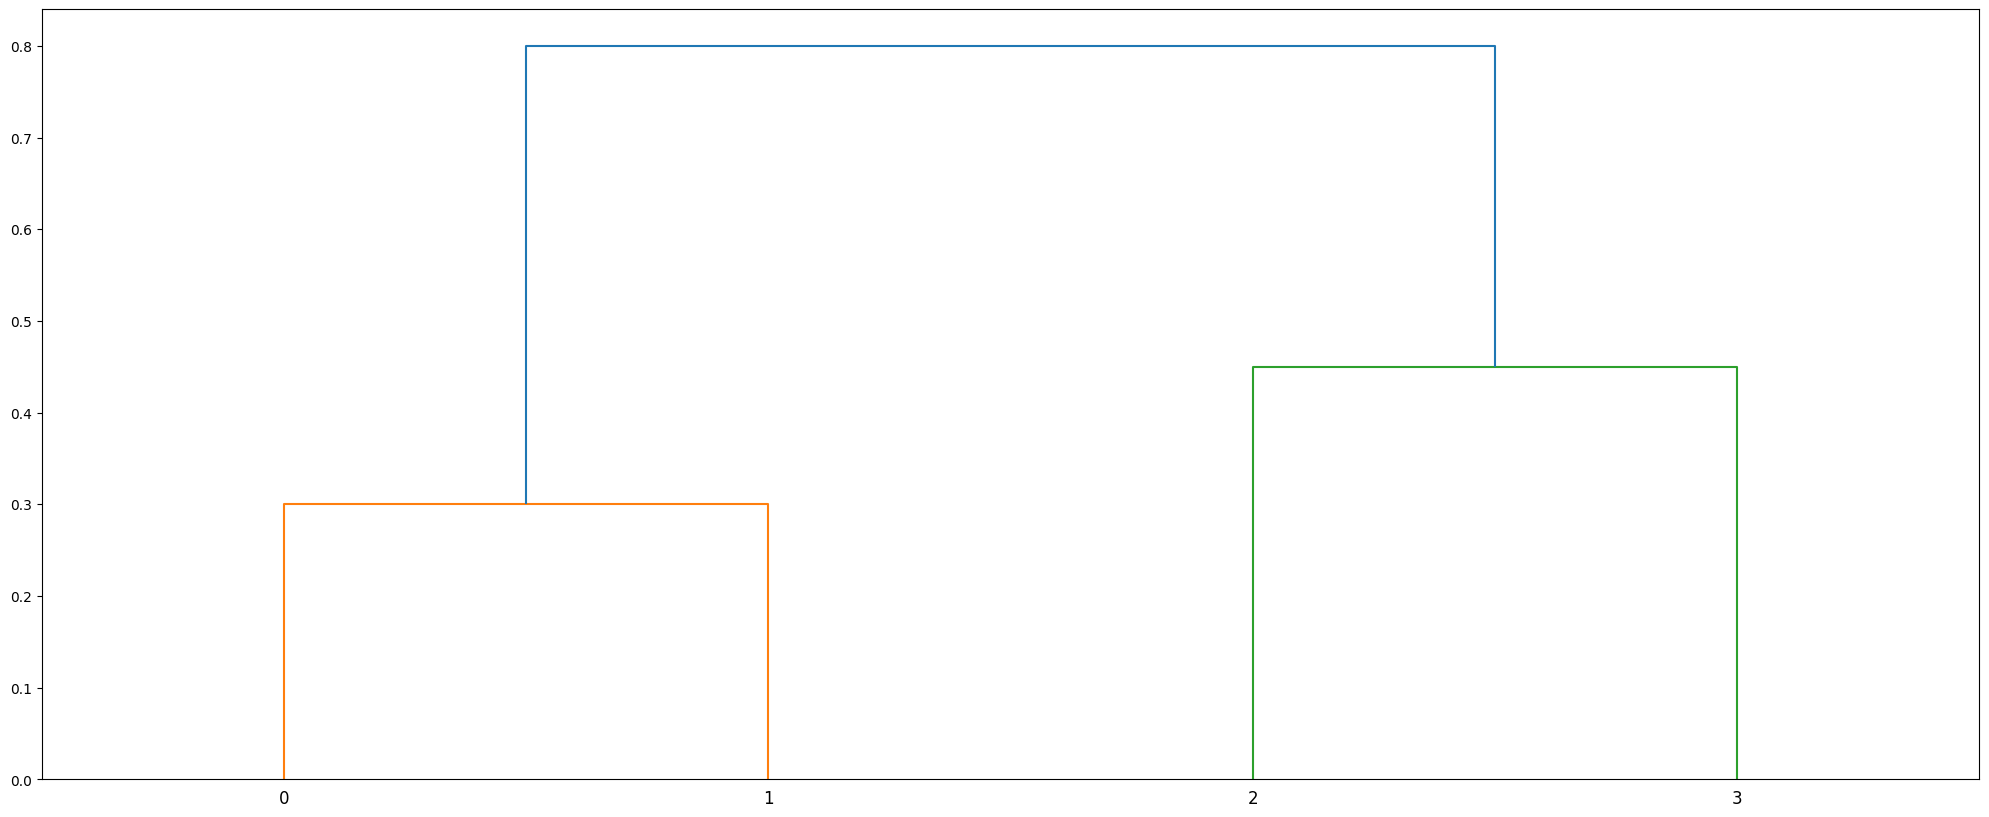

In [83]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
dendrogram(hc_complete)
plt.show()

In [84]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters=4).T)

[[0 1 2 3]]


In [85]:
from scipy.spatial.distance import pdist
df_dist = pdist(dfHVC_scaled, 'euclidean')
df_dist

array([2.97837269, 3.74465393, 2.57588353, ..., 4.09484458, 7.17307894,
       4.43632401])

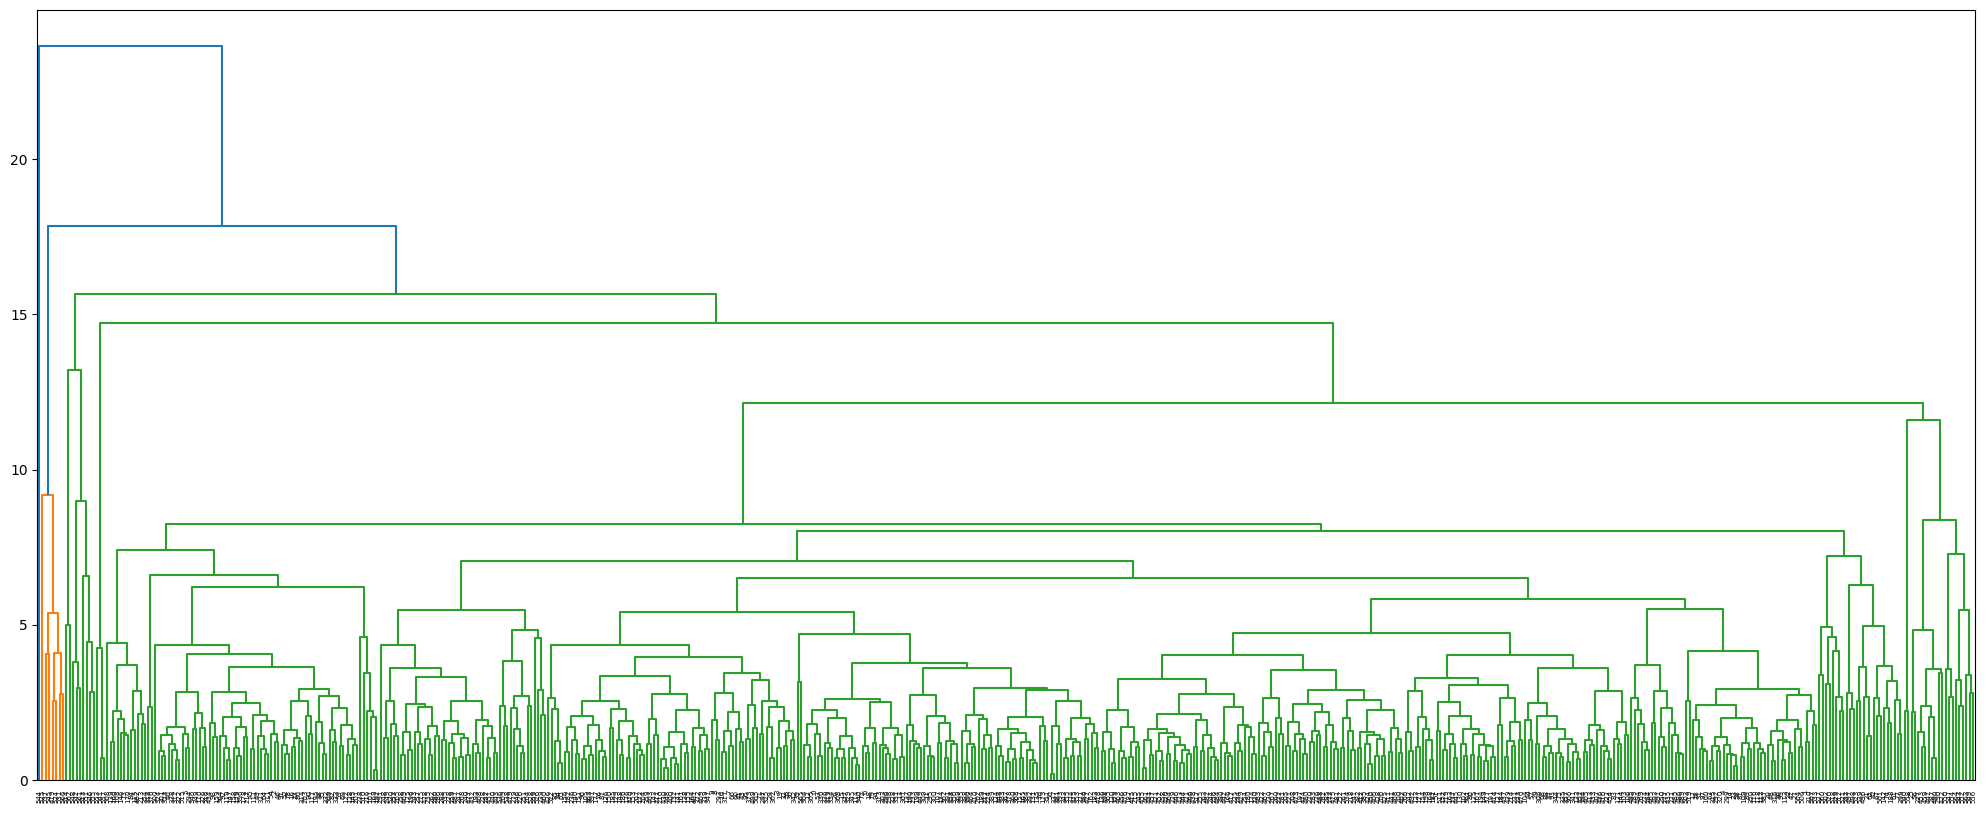

In [86]:
dfHVC_complete = linkage(df_dist, method='complete')
plt.figure(figsize=(25, 10))
dendrogram(dfHVC_complete)
plt.show()

In [87]:
print(cut_tree(dfHVC_complete, n_clusters=4))

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [88]:
from scipy.cluster.hierarchy import fcluster
dfHVC_complete_labels = fcluster(dfHVC_complete, 4, criterion='maxclust')
dfHVC_complete_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [89]:
matching_matrix = pd.crosstab(index=dfHVC_labels,
            columns = dfHVC_complete_labels,
            rownames=['Reeal_groups'],
            colnames=['K-means_clusters'])
matching_matrix

K-means_clusters,1,2,3,4
Reeal_groups,,,,
0=Blood Donor,1,0,495,0
1=Hepatitis,0,2,21,0
2=Fibrosis,4,0,16,0
3=Cirrhosis,2,7,18,1


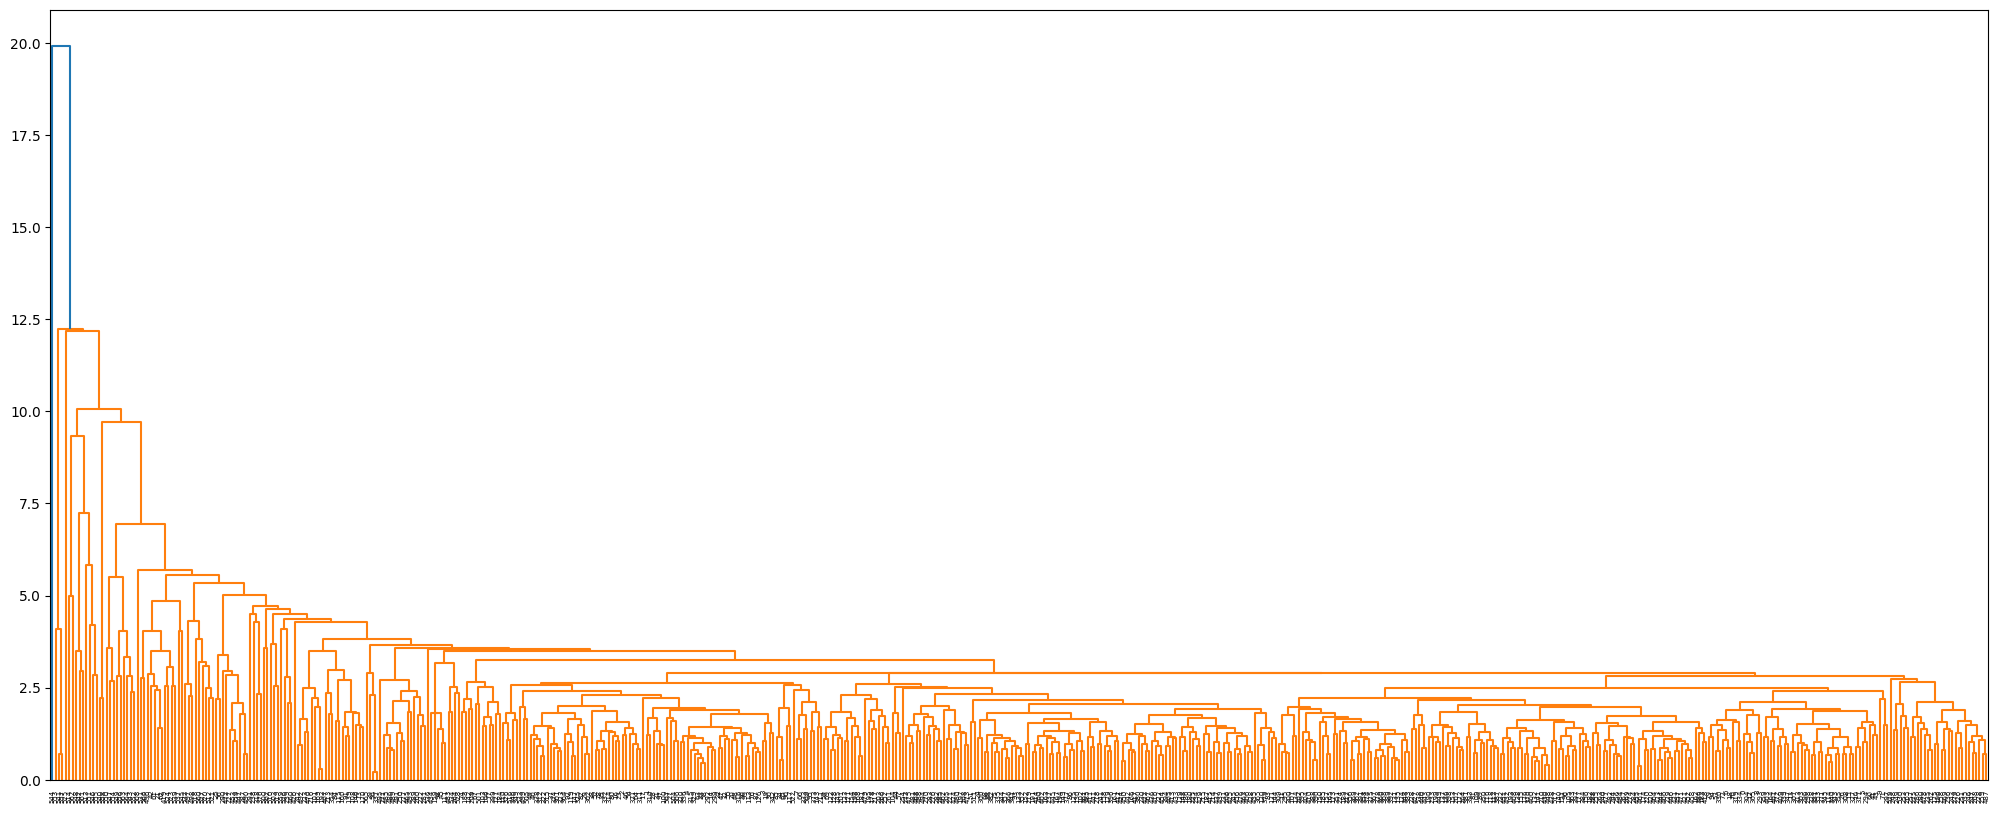

In [90]:
dfHVC_average = linkage(df_dist, method='average')
plt.figure(figsize=(25, 10))
dendrogram(dfHVC_average)
plt.show()

In [91]:
from scipy.cluster.hierarchy import fcluster
dfHVC_average_labels = fcluster(dfHVC_average, 4, criterion='maxclust')
dfHVC_average_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [92]:
matching_matrix = pd.crosstab(index=dfHVC_labels,
            columns = dfHVC_average_labels,
            rownames=['Reeal_groups'],
            colnames=['K-means_clusters'])
matching_matrix

K-means_clusters,1,2,3,4
Reeal_groups,,,,
0=Blood Donor,0,496,0,0
1=Hepatitis,0,23,0,0
2=Fibrosis,0,19,1,0
3=Cirrhosis,3,24,0,1


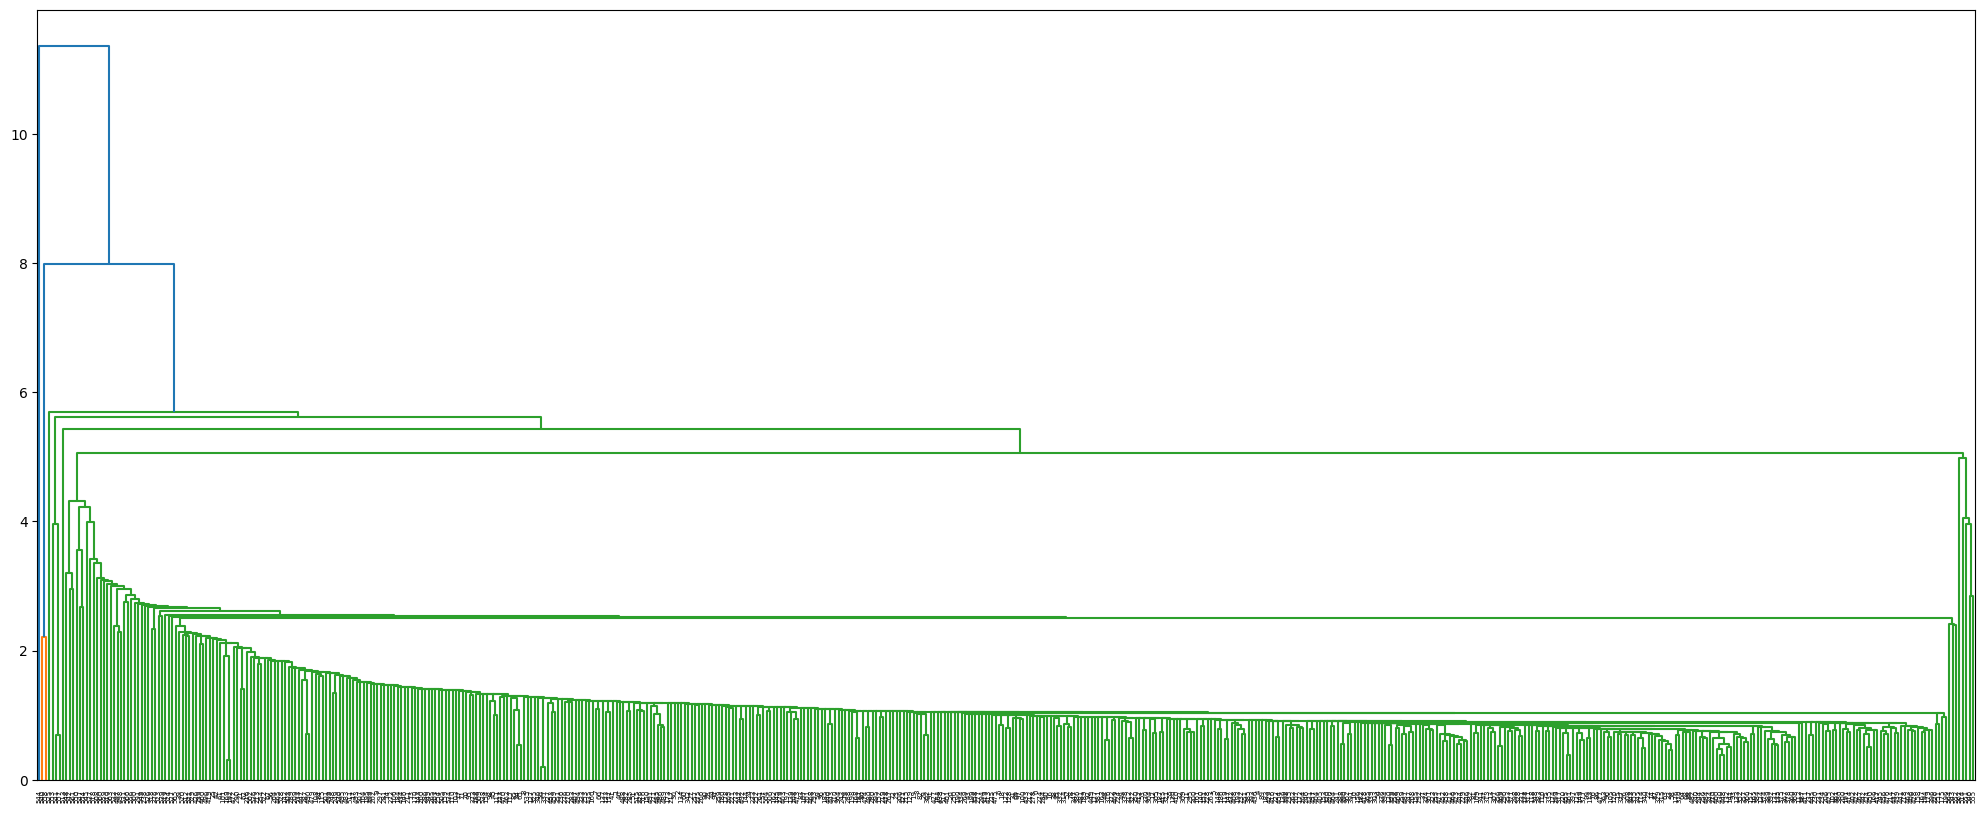

In [93]:
dfHVC_single = linkage(df_dist, method='single')
plt.figure(figsize=(25, 10))
dendrogram(dfHVC_single)
plt.show()

In [94]:
from scipy.cluster.hierarchy import fcluster
dfHVC_single_labels = fcluster(dfHVC_single, 4, criterion='maxclust')
dfHVC_single_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [95]:
matching_matrix = pd.crosstab(index=dfHVC_labels,
            columns = dfHVC_single_labels,
            rownames=['Reeal_groups'],
            colnames=['K-means_clusters'])
matching_matrix

K-means_clusters,1,2,3,4
Reeal_groups,,,,
0=Blood Donor,0,496,0,0
1=Hepatitis,0,23,0,0
2=Fibrosis,0,19,1,0
3=Cirrhosis,2,25,0,1
